# <span style="color:#37464f"><center>**Yannick NOUDJOUKOUANG**</center></span>
### **<center>JEDHA (FULLSTACK - 2021)</center>**
# **<center>RECOMMANDATION APPLICATION</center>**

---


### **1. Introduction**

The purpose of this project is to provide an handy tool for the customer. <br>
This tool would allow the client to find any product (ex: a Car) or service around him.

This project uses : 
- Web scraping
- Machine Learning : Deep Learning
- Web application deployment
- Data visualization
- Data Management : EDA, ETL
- Project Management

---

In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt #To provide data visualization

# Import BeautifulSoup
from bs4 import BeautifulSoup
import requests

#Organize text
from collections import defaultdict

In [4]:
# Use '!' only if you are installing directly from your notebook. 
# '!' sign tells Jupyter Notebook to interpret the following code as bash code (what you use in your terminal)
!pip install beautifulsoup4 -q

In [5]:
# Use '!' only if you are installing directly from your notebook. 
# '!' sign tells Jupyter Notebook to interpret the following code as bash courlde (what you use in your terminal)
!pip install lxml -q
!pip install html5lib -q

# LA CENTRALE - CARS

In [41]:
LaCentrale_https = 'https://www.lacentrale.fr'

In [42]:
brands = ['renault','peugeot','citroen','toyota','volkswagen']

In [43]:
#Scraping settings
page_to_scrap = 150
nbr_car = 16

In [ ]:
link_car = []
list_brand = []
list_model = []
list_price = []
list_year = []
list_km = []
list_transition = []
list_energie = []
list_longitude = []
list_latitude = []
list_zipcode = []


count=0
for p in range(page_to_scrap):
    
    
  
    for i in range(len(brands)):
        r_LaCentrale = requests.get('https://www.lacentrale.fr/occasion-voiture-marque-{}-{}.html'.format(brands[i],p),headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
        soup_page = BeautifulSoup(r_LaCentrale.content)
        
        
        
        for e in range(nbr_car):

            try:

                link = soup_page.select('div.searchCard')[e].find_all('a')[0].get('href')
                car_link = LaCentrale_https+link

                response_car = requests.get(car_link, headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
                sc = BeautifulSoup(response_car.content)


                brand = sc.find_all('div',"cbm-tab__content")[1].find_all('input')[1].get('value')

                model = sc.find_all('div',"cbm-tab__content")[1].find_all('input')[2].get('value')

                price = sc.find_all('div',"cbm-tab__content")[1].find_all('input')[3].get('value')

                car_description = defaultdict()

                soup_car_description = sc.select("div.cbm-moduleInfos__informationList.cbm-moduleInfos__information_column_break ul li")

                for elt in soup_car_description:
                    feature = elt.get_text().split(':')
                    car_description[feature[0].strip()] = feature[1].strip()

                year = car_description['Année']

                km = car_description['Kilométrage compteur?']
                km = km.replace('Km','').replace(' ','').strip()

                trans = car_description['Boîte de vitesse']

                energie = car_description['Énergie']


                #location
                soup_latlon = sc.select('div.cbm-mainInfos script')[9]
                
                #location (ZipCode)
                soup_popin_car = sc.select('div script')[1]
                for elt in soup_popin_car:
            
                    feature = elt.split(',')
                    zipcode = feature[26].split(':')[1].replace('"','').replace('}','')
                
                  
                #location (Lat, Lon)
                for elt in soup_latlon:
                    feature = elt.split(',')
                    longitude = feature[24].split(':')[2].replace('"','')
                    latitude = feature[25].split(':')[1].replace('"','').replace('}','')
                
                count +=1
                print('N°{} - Scraping brand : {} for Page {} '.format(count,brands[i],p+1))                 

            except:
                continue

            link_car.append(car_link)
            list_brand.append(brand)
            list_model.append(model)
            list_price.append(price)
            list_year.append(year)
            list_km.append(km)
            list_transition.append(trans)
            list_energie.append(energie)
            list_longitude.append(longitude)
            list_latitude.append(latitude)
            list_zipcode.append(zipcode)


In [48]:
list_car = {'Brand' : list_brand,
                 'Model': list_model,
                    'Gear' : list_transition,
                        'KM' : list_km,
                        'Energie' : list_energie,
                                 'Year' : list_year,
                                     'Price' : list_price,
                                        'Zip_code' : list_zipcode,
                                         'longitude' : list_longitude, 
                                             'latitude' : list_latitude,
                                                'link_car' : link_car,
                 
                }

#list_car

In [49]:
df_car = pd.DataFrame(list_car)

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude,link_car
0,RENAULT,CLIO,mécanique,7577,Diesel,2020,17830,33310,-0.5104989999999999,44.878583,https://www.lacentrale.fr/auto-occasion-annonc...
1,RENAULT,GRAND SCENIC,automatique,30201,Diesel,2020,23070,76120,1.0465014,49.4180309,https://www.lacentrale.fr/auto-occasion-annonc...
2,RENAULT,CLIO,mécanique,49851,Diesel,2019,11540,24400,0.3698788,45.0440403,https://www.lacentrale.fr/auto-occasion-annonc...
3,RENAULT,CLIO,mécanique,19318,Essence,2020,13360,24400,0.3698788,45.0440403,https://www.lacentrale.fr/auto-occasion-annonc...
4,RENAULT,KADJAR,mécanique,17010,Diesel,2021,27280,31120,1.3900007,43.51913769999999,https://www.lacentrale.fr/auto-occasion-annonc...
...,...,...,...,...,...,...,...,...,...,...,...
11526,VOLKSWAGEN,UP!,mécanique,126181,Essence,2013,7670,94110,2.327393,48.8097639,https://www.lacentrale.fr/auto-occasion-annonc...
11527,VOLKSWAGEN,POLO,mécanique,12,Essence,2022,22660,33310,-0.5121479,44.88030149999999,https://www.lacentrale.fr/auto-occasion-annonc...
11528,VOLKSWAGEN,T-ROC,automatique,4929,Essence,2021,33020,31670,1.5177695,43.54516710000001,https://www.lacentrale.fr/auto-occasion-annonc...
11529,VOLKSWAGEN,TIGUAN,automatique,23207,Diesel,2022,47180,31200,1.4208297,43.6587377,https://www.lacentrale.fr/auto-occasion-annonc...


# OBTAIN DATASET FROM LA CENTRALE SCRAPING

In [ ]:
df_car.to_csv('LaCentrale_car150.csv',encoding='utf-8-sig',index=False)

# ANALYSIS ON DATASET FROM LA CENTRALE SCRAPING

In [ ]:
df_car.groupby('Brand')['Model'].count()

In [ ]:
df_car.groupby('Brand')['Model'].nunique()

In [ ]:
df_car.groupby(['Brand','Model'])['KM'].nunique()

# LOAD DATASET FROM AUTOSPHERE & JOIN WITH LA CENTRALE

In [4]:
df_car = pd.read_csv('LaCentrale_car150.csv')
df_car.sample(5)

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude,link_car
8254,VOLKSWAGEN,POLO,automatique,29520,Essence,2017,17820,64480,-1.431418,43.372951,https://www.lacentrale.fr/auto-occasion-annonc...
2718,PEUGEOT,108,mécanique,5346,Essence,2021,10150,92250,2.238421,48.903225,https://www.lacentrale.fr/auto-occasion-annonc...
7716,TOYOTA,YARIS,mécanique,32294,Essence,2019,11640,44700,-1.622639,47.257004,https://www.lacentrale.fr/auto-occasion-annonc...
10952,CITROEN,C4 CACTUS,mécanique,4300,Essence,2021,18040,42210,4.231142,45.651439,https://www.lacentrale.fr/auto-occasion-annonc...
9471,TOYOTA,C-HR,automatique,34812,Hybride essence électrique,2019,23860,56000,-2.785979,47.669626,https://www.lacentrale.fr/auto-occasion-annonc...


# LOAD DATASET FROM AUTOSPHERE & JOIN WITH LA CENTRALE

In [7]:
scrap_autosphere = pd.read_csv('autosphere.csv')
scrap_autosphere.sample(5)

,Unnamed: 0,Marque,Modele,Transmission,Kilometre,Energie,Annee,Prix,Code_postal,longitude,latitude
4306,4306,RENAULT,Grand scenic,Manuelle,66146,Diesel,2017,14 767,69200,4.871500,45.7025
4202,4202,RENAULT,Captur,Manuelle,11306,Diesel,2020,19 980,1000,5.207500,46.2022
2532,2532,PEUGEOT,508,Automatique,72621,Diesel,2019,27 490,63200,3.116187,45.9341
406,406,PEUGEOT,3008,Manuelle,80447,Essence,2018,19 900,30133,4.763400,43.9581
6418,6418,VOLKSWAGEN,Polo,Manuelle,5000,Essence,2021,17 700,63170,3.126350,45.7516


In [8]:
#Remove column 'Unnamed' from autosphere dataset
scrap_autosphere_2 = scrap_autosphere.drop(columns=['Unnamed: 0',],axis=1)
scrap_autosphere_2.head()

,Marque,Modele,Transmission,Kilometre,Energie,Annee,Prix,Code_postal,longitude,latitude
0,CITROEN,C4,Manuelle,28561,Essence,2018,14 890,60200,2.826100,49.4179
1,CITROEN,C4 cactus,Manuelle,14702,Essence,2020,15 999,86000,0.333300,46.5833
2,CITROEN,C4 picasso,Manuelle,88300,Diesel,2015,12 479,51100,4.033300,49.2500
3,CITROEN,C5 aircross,Automatique,1742,Diesel,2021,32 990,16430,0.145933,45.7167
4,CITROEN,C5 aircross,Automatique,50,Diesel,2020,30 880,38320,5.768200,45.1374


In [9]:
scrap_autosphere_2 = scrap_autosphere_2.rename(columns={"Marque": "Brand",
                                                         "Modele": "Model",
                                                         "Transmission": "Gear",
                                                            "Kilometre" : "KM",
                                                               "Annee" : "Year",
                                                                "Prix" : "Price",
                                                                    "Code_postal" : "Zip_code"
                                                                                                  })
                                                 
                                   
                                   

In [10]:
scrap_autosphere_2.to_csv('autosphere2.csv',encoding='utf-8-sig',index=False)

In [12]:
scrap_autosphere_2.sample(5)

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
2446,PEUGEOT,208,Automatique,21562,Electrique,2020,23 780,73000,5.92370,45.6216
4754,RENAULT,Espace,Automatique,100,Diesel,2021,48 990,57180,6.13350,49.3467
462,PEUGEOT,3008,Manuelle,42000,Diesel,2018,21 900,38000,5.72240,45.1715
6094,VOLKSWAGEN,Touran,Automatique,90573,Diesel,2017,23 990,57740,6.64330,49.1169
3329,RENAULT,Kadjar,Manuelle,20293,Diesel,2020,22 990,59160,3.01025,50.6330


In [13]:
df_car2 = df_car.drop(columns=['link_car'],axis=1)

In [14]:
df_car2.head()

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
0,RENAULT,CLIO,mécanique,7577,Diesel,2020,17830,33310,-0.510499,44.878583
1,RENAULT,GRAND SCENIC,automatique,30201,Diesel,2020,23070,76120,1.046501,49.418031
2,RENAULT,CLIO,mécanique,49851,Diesel,2019,11540,24400,0.369879,45.044040
3,RENAULT,CLIO,mécanique,19318,Essence,2020,13360,24400,0.369879,45.044040
4,RENAULT,KADJAR,mécanique,17010,Diesel,2021,27280,31120,1.390001,43.519138


In [15]:
#Join the two dataset
frames = [df_car2,scrap_autosphere_2]

In [17]:
df_conso = pd.concat(frames,ignore_index=True)
df_conso.sample(5)

,Brand,Model,Gear,KM,Energie,Year,Price,Zip_code,longitude,latitude
9127,PEUGEOT,2008,mécanique,13250,Diesel,2016,24980,31100,1.398690,43.558487
11419,CITROEN,C4 SPACETOURER,mécanique,29880,Essence,2019,22400,84200,5.052231,44.034068
5356,TOYOTA,VERSO,automatique,161491,Diesel,2010,11570,54270,6.230482,48.705315
11552,CITROEN,C5 aircross,Automatique,4305,Diesel,2021,28 990,73000,5.923700,45.621600
16145,RENAULT,Megane,Manuelle,18083,Diesel,2020,16 790,13700,5.223900,43.416000


In [16]:
df_conso.to_csv('LaCentrale+autosphere.csv',encoding='utf-8-sig',index=False)

# JOINING THE 2 DATASETS

In [17]:
dfa = pd.read_csv('LaCentrale+autosphere.csv')

# CLEANING & FILTERING OF THE DATASET

In [19]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18795 entries, 0 to 18794
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      18795 non-null  object 
 1   Model      18795 non-null  object 
 2   Gear       18773 non-null  object 
 3   KM         18795 non-null  int64  
 4   Energie    18792 non-null  object 
 5   Year       18795 non-null  int64  
 6   Price      18795 non-null  object 
 7   Zip_code   18795 non-null  int64  
 8   longitude  18574 non-null  float64
 9   latitude   18574 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.4+ MB


In [20]:
print("Percentage of missing values:(%)")

print('--------------------------------')

display(100*dfa.isnull().sum()/dfa.shape[0])

Percentage of missing values:(%)
--------------------------------


Brand        0.000000
Model        0.000000
Gear         0.117052
KM           0.000000
Energie      0.015962
Year         0.000000
Price        0.000000
Zip_code     0.000000
longitude    1.175845
latitude     1.175845
dtype: float64

In [21]:
#remove the space from string type
dfa['Price'] = dfa['Price'].str.replace(" ","")

#Change column "Price" to float
dfa['Price'] = dfa['Price'].astype('float')

In [23]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0])*100,4))

Dataset cleaning:(%)
--------------------------------
We have removed 0 rows from the initial dataset
It represents the equivalent of 0 % of the initial dataset


## BRAND CLEANING

In [ ]:
dfa.groupby('Brand')['KM'].count()

In [ ]:
#Filter per brand
mask2 = dfa['Brand'].isin(['RENAULT','PEUGEOT','CITROEN','TOYOTA','VOLKSWAGEN'])
dfa = dfa.loc[mask2,:]

In [ ]:
dfa.groupby('Brand')['Model'].count()

In [ ]:
100*dfa.Brand.value_counts()/dfa['Model'].count()

In [28]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 55 rows from the initial dataset
It represents the equivalent of 0.29 % of the initial dataset


## MODEL CLEANING

In [29]:
# Transform the column Model with Uppercase
dfa['Model'] = dfa['Model'].str.upper()

# Transform the column Gear with Uppercase
dfa['Gear'] = dfa['Gear'].str.upper()

# Transform the column Energie with Uppercase
dfa['Energie'] = dfa['Energie'].str.upper()

#Correcting one specific model for Toyota
dfa['Model'] = dfa['Model'].str.replace("RAV 4","RAV4")

In [30]:
#Statistics on brand's models
model_brands = dfa.groupby('Brand')['Model'].nunique()
for i in range(len(model_brands)):
    print('The brand {} has {} models.'.format(model_brands.index[i],model_brands[i]))
print('--------------------------------------------------------------------------------')
print(' ')
print('We are going to reduce the number of models to stick with the 5 most relevant ones.')

The brand CITROEN has 26 models.
The brand PEUGEOT has 27 models.
The brand RENAULT has 29 models.
The brand TOYOTA has 30 models.
The brand VOLKSWAGEN has 44 models.
--------------------------------------------------------------------------------
 
We are going to reduce the number of models to stick with the 5 most relevant ones.


In [31]:
#Filter most relevant models
mask3 = dfa['Model'].isin(['C3','C4','C4 CACTUS','C5 AIRCROSS','BERLINGO',
                           '208','308','2008','3008','108',
                           'CLIO','CAPTUR','MEGANE','MEGANE COUPE','TWINGO','ZOE',
                           'YARIS','C-HR','AYGO','COROLLA','RAV4',
                           'GOLF','POLO','T-ROC','TIGUAN','UP!'])
dfa = dfa.loc[mask3,:]

In [32]:
model_brands = dfa.groupby('Brand')['Model'].nunique()
for i in range(len(model_brands)):
    print('The brand {} now has {} models.'.format(model_brands.index[i],model_brands[i]))

The brand CITROEN now has 5 models.
The brand PEUGEOT now has 5 models.
The brand RENAULT now has 6 models.
The brand TOYOTA now has 5 models.
The brand VOLKSWAGEN now has 5 models.


In [33]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4587 rows from the initial dataset
It represents the equivalent of 24.41 % of the initial dataset


## GEAR CLEANING

In [ ]:
dfa.groupby(['Brand','Gear'],observed=True)['KM'].nunique()

In [35]:
#Remove rows with '/'
mask4 = dfa['Gear'] != '/'
dfa = dfa.loc[mask4,:]

#Clean the column 'Gear'
dfa['Gear'] = dfa['Gear'].str.replace("MÉCANIQUE","MANUELLE")

#Removed all the rows with 'NaN'
dfa['Gear'] = dfa['Gear'].dropna()

In [ ]:
dfa.groupby('Gear')['KM'].nunique()

In [ ]:
dfa.groupby(['Brand','Gear'],observed=True)['KM'].nunique()

In [38]:
#Creating a new column which classify 'new' and 'used' cars
dfa['Category'] = dfa['KM'].apply(lambda x: 'New' if x <= 100 
                                                else 'Second-Hand' if x > 100 
                                                else  x
                                                )
#Move column 'Category'
columns = list(dfa)
mov_col = dfa.pop('Category')
dfa.insert(4, 'Category', mov_col)

In [39]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4597 rows from the initial dataset
It represents the equivalent of 24.46 % of the initial dataset


## ENERGIE CLEANING

In [ ]:
dfa.groupby('Energie')['KM'].nunique()

In [ ]:
#Merging to a specific gear type for Toyota
dfa['Energie'] = dfa['Energie'].str.replace("HYBRIDE DIESEL ÉLECTRIQUE","HYBRIDE")
dfa['Energie'] = dfa['Energie'].str.replace("HYBRIDE ESSENCE ÉLECTRIQUE","HYBRIDE")
dfa['Energie'] = dfa['Energie'].str.replace("HYBRIDE R","HYBRIDE")

#Dropping the rows with 'GNV' and 'GPL'
mask5 = dfa['Energie'].isin(['DIESEL','ELECTRIQUE','ESSENCE','HYBRIDE'])
dfa = dfa.loc[mask5,:]

In [ ]:
dfa.groupby('Energie')['KM'].nunique()

In [43]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4610 rows from the initial dataset
It represents the equivalent of 24.529999999999998 % of the initial dataset


## YEAR CLEANING

In [44]:
# Change the Date 2022 for 2021, it might have been an error
dfa['Year'] = dfa['Year'].apply(lambda x: 2021 if x == 2022 else x)

In [45]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0])*100,4))

Dataset cleaning:(%)
--------------------------------
We have removed 4610 rows from the initial dataset
It represents the equivalent of 0 % of the initial dataset


## ZIPCODE CLEANING

No cleanin required on this feature

## LONGITUDE & LATITUDE CLEANING

In [46]:
#Removed all the rows with 'NaN'
dfa['longitude'] = dfa['longitude'].dropna()
dfa['latitude'] = dfa['latitude'].dropna()

In [48]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0])*100,4))

Dataset cleaning:(%)
--------------------------------
We have removed 4610 rows from the initial dataset
It represents the equivalent of 0 % of the initial dataset


## CLEAN ALL THE REMAINING ROWS WITH 'Non value'

In [49]:
dfa = dfa.dropna()
dfa.shape

(13978, 11)

In [50]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 4817 rows from the initial dataset
It represents the equivalent of 25.629999999999995 % of the initial dataset


## CLEAN DUPLICATED VALUES

In [51]:
dfa = dfa.drop_duplicates(subset=['Brand','Model','Gear','KM','Category','Energie','Year','Price','Zip_code'], keep='first')
dfa.shape

(12309, 11)

In [52]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 6486 rows from the initial dataset
It represents the equivalent of 34.510000000000005 % of the initial dataset


In [ ]:
dfa.groupby(['Year'],observed=True)['KM'].nunique()

In [ ]:
dfa.isnull().sum()

In [ ]:
dfa.info()

In [ ]:
dfa.describe(include='all')

# INPUTING STATE & REGION

In [57]:
!pip install pgeocode -q

In [58]:
import pgeocode

In [59]:
city = []
state = []
region = []

for x in dfa['Zip_code']:
    #print(‘PROCESSING _____ ‘, x , ’ _____‘)
    
    zipcountry  =  pgeocode.Nominatim ('fr')
    zip_details = zipcountry.query_postal_code(x)
    
    city.append(zip_details['place_name'])
    state.append(zip_details['state_name'])
    region.append(zip_details['county_name'])
    
    
dfa['City'] = city
dfa['State'] = state
dfa['Region'] = region


In [60]:
dfa = dfa.dropna()

In [61]:
print("Dataset cleaning:(%)")

print('--------------------------------')

print('We have removed {} rows from the initial dataset'.format(-(dfa.shape[0]-df_conso.shape[0])))
print('It represents the equivalent of {} % of the initial dataset'.format(round(-(dfa.shape[0]-df_conso.shape[0])/df_conso.shape[0],4)*100))

Dataset cleaning:(%)
--------------------------------
We have removed 7217 rows from the initial dataset
It represents the equivalent of 38.4 % of the initial dataset


In [62]:
# Transform the column City with Uppercase
dfa['City'] = dfa['City'].str.upper()

# Transform the column State with Uppercase
dfa['State'] = dfa['State'].str.upper()

# Transform the column Region with Uppercase
dfa['Region'] = dfa['Region'].str.upper()

In [ ]:
#Cleaning index
dfa = dfa.reset_index()
dfa = dfa.drop(columns=['index',],axis=1)

In [64]:
#Creating csv from 2 scraping after cleaning
dfa.to_csv('LaCentrale+autosphere+GPS.csv')

# OPEN FINAL DATASET

In [18]:
!pip install plotly==4.9.0 -q #import Plotly

In [19]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.express as px


In [20]:
df_conso = pd.read_csv('LaCentrale+autosphere.csv')
df_final = pd.read_csv('LaCentrale+autosphere+GPS.csv')
df_final = df_final.drop(columns=['Unnamed: 0',],axis=1)

In [21]:
brand_nbr = df_final.groupby('Brand')['Model'].count()

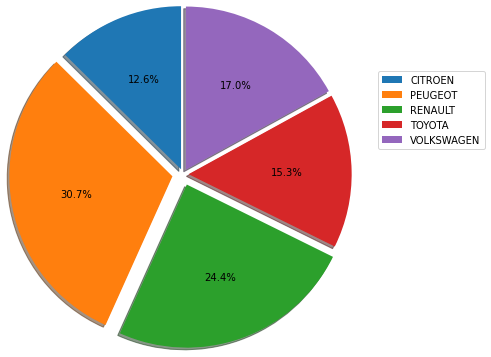

In [22]:

plt.figure(figsize = (12,5))
plt.pie(
    brand_nbr, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 90,
    explode = (0.05, 0.1, 0.1,0.05,0.05),
    radius = 1.5 
       )

plt.legend(brand_nbr.index, bbox_to_anchor=(1.2, 0.90));

In [23]:
energie_weight = df_final.groupby('Energie')['KM'].nunique()

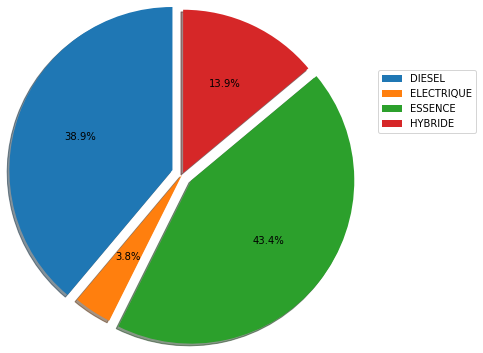

In [24]:
plt.figure(figsize = (12,5))
plt.pie(
    energie_weight, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 90,
    explode = (0.1, 0.01, 0.1,0.01),
    radius = 1.5 
       )

plt.legend(energie_weight.index, bbox_to_anchor=(1.2, 0.90));

# CLIENT SELECTOR

In [25]:
data = df_final

In [26]:
Brand = 'TOYOTA'
Model = 'YARIS'
Gear = 'AUTOMATIQUE'
KrM = 50000
Energie = 'HYBRIDE'
Year = 2019
Price = 30000
State = 'AUVERGNE-RHÔNE-ALPES'

In [27]:
maskall = (data['Brand'] == Brand) &\
            (data['Model'] == Model) &\
            (data['Gear'] == Gear) &\
            (data['KM'] <= KrM) &\
            (data['Energie'] == Energie) &\
            (data['Year'] >= Year) & \
            (data['Price'] <= Price) &\
            (data['State'] == State)

data = data.loc[maskall,:]
data.sample(5)

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region
4850,TOYOTA,YARIS,AUTOMATIQUE,18785,Second-Hand,HYBRIDE,2019,16470.0,69200,4.866374,45.717537,VÉNISSIEUX,AUVERGNE-RHÔNE-ALPES,RHÔNE
6067,TOYOTA,YARIS,AUTOMATIQUE,6840,Second-Hand,HYBRIDE,2021,29580.0,69700,4.764451,45.586888,"SAINT-JEAN-DE-TOUSLAS, CHASSAGNY, MONTAGNY, SA...",AUVERGNE-RHÔNE-ALPES,RHÔNE
4675,TOYOTA,YARIS,AUTOMATIQUE,36608,Second-Hand,HYBRIDE,2019,16920.0,74330,6.081750,45.932294,"NONGLARD, SILLINGY, LOVAGNY, EPAGNY METZ-TESSY...",AUVERGNE-RHÔNE-ALPES,HAUTE-SAVOIE
163,TOYOTA,YARIS,AUTOMATIQUE,12,New,HYBRIDE,2021,25810.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE
158,TOYOTA,YARIS,AUTOMATIQUE,11,New,HYBRIDE,2021,21610.0,69960,4.920700,45.668576,CORBAS,AUVERGNE-RHÔNE-ALPES,RHÔNE


In [28]:
fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Category", 
                        zoom=7.5, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation : TEST')
fig.show()

In [29]:
df_final.shape

(11578, 14)

In [ ]:
#Car per State
df_final.groupby('State')['KM'].count()

In [ ]:
#Car per State (%)
df_final.groupby('State')['KM'].count()/df_final.shape[0]

In [ ]:
#Car per Category
df_final.groupby('Category')['KM'].count()

In [ ]:
#Car per Category (%)
df_final.groupby('Category')['KM'].count()/df_final.shape[0]

# VISUALIZATIONS

In [83]:
fig = px.scatter_mapbox(df_final, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Category", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation in France per category')
fig.show()

In [84]:
fig = px.scatter_mapbox(df_final, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Energie", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation in France per energy')
fig.show()

In [85]:
fig = px.scatter_mapbox(df_final, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Brand", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation in France per brand')
fig.show()

# CLIENT SELECTION & FILTERS

In [86]:
print('The final dataset has {} rows and {} columns.'.format(df_final.shape[0],df_final.shape[1]))
print('We have cleaned {} rows ({}%) and add {} columns.'.format(-(df_final.shape[0]-df_conso.shape[0]),round(-(df_final.shape[0]-df_conso.shape[0])/df_conso.shape[0]*100,2),df_final.shape[1]-df_conso.shape[1]))

The final dataset has 11578 rows and 14 columns.
We have cleaned 7217 rows (38.4%) and add 4 columns.


In [87]:
df_final.shape

(11578, 14)

## A) SCORING

In [88]:
def scoring(df_final):
    
    scoring = 0
    
    if df_final['Gear'] == 'MANUELLE':
        scoring += 1
    elif df_final['Gear'] != 'MANUELLE':
        scoring += 2

    scoring
        
        
    if df_final['KM'] <= 100:
        scoring += 10
    elif df_final['KM'] >100 and df_final['KM'] <= 8000:# au debut la voiture decote plus vite 
        scoring += 9
    elif df_final['KM'] > 8000 and df_final['KM'] <= 22893:
        scoring += 8
    elif df_final['KM'] > 22893 and df_final['KM'] <= 51123:
        scoring += 7
    elif df_final['KM'] > 51123 and df_final['KM'] <= 80000: # a plus de 80milles il y a les courois a changer entretient plus gros plus cher 
        scoring += 6 
    elif df_final['KM'] > 80000 and df_final['KM'] <= 110000: 
        scoring += 5  
    elif df_final['KM'] > 110000 and df_final['KM'] <= 130000: 
        scoring += 4
    elif df_final['KM'] > 130000 and df_final['KM'] <= 150000: 
        scoring += 3
    elif df_final['KM'] > 150000 and df_final['KM'] <= 200000: 
        scoring += 2
    elif df_final['KM'] > 200000 : 
        scoring += 1
   
    if df_final['Energie'] == 'ESSENCE' :
        scoring +=3
    elif df_final['Energie'] =='DIESEL':# 2024 plus de diesel a paris 
        scoring += 2
    elif df_final['Energie'] =='HYBRIDE':# norrme wltp = rejete un co2 inferieur a 90gr et 0gr pour l'electrique
        scoring += 4
    elif df_final['Energie'] == 'ELECTRIQUE':
        scoring += 5
    
    if df_final['Year'] < 2000 :
        scoring += 0
    elif df_final['Year'] >= 2000 and df_final['Year'] <= 2013 :
        scoring += 1
    elif df_final['Year'] >= 2014 and df_final['Year'] <= 2018 :
        scoring += 2
    elif df_final['Year'] > 2018 and df_final['Year'] <= 2019 : # 2019 a 2020
        scoring += 3
    elif df_final['Year'] > 2019 and df_final['Year'] <= 2020 :
        scoring += 4
    elif df_final['Year'] > 2020 :
        scoring += 5
        
    scoring = round((scoring/22)*10,2)
        
    return scoring

df_final['Scoring'] = df_final.apply(scoring, axis=1)
df_final.sample(5)

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
4219,RENAULT,MEGANE,MANUELLE,6851,Second-Hand,DIESEL,2021,22180.0,76000,1.066394,49.448129,ROUEN,NORMANDIE,SEINE-MARITIME,7.73
1936,PEUGEOT,108,MANUELLE,11,New,ESSENCE,2021,14480.0,33700,-0.688450,44.822822,MÉRIGNAC,NOUVELLE-AQUITAINE,GIRONDE,8.64
3476,VOLKSWAGEN,GOLF,AUTOMATIQUE,18096,Second-Hand,DIESEL,2021,38100.0,64230,-0.439551,43.324777,"AUBIN, AUSSEVIELLE, SIROS, UZEIN, BOUGARBER, M...",NOUVELLE-AQUITAINE,PYRÉNÉES-ATLANTIQUES,7.73
7329,PEUGEOT,2008,AUTOMATIQUE,3000,Second-Hand,ELECTRIQUE,2021,32890.0,63000,3.086300,45.779700,CLERMONT-FERRAND,AUVERGNE-RHÔNE-ALPES,PUY-DE-DÔME,9.55
7790,PEUGEOT,208,MANUELLE,14010,Second-Hand,ESSENCE,2019,12980.0,69200,4.871500,45.702500,VÉNISSIEUX,AUVERGNE-RHÔNE-ALPES,RHÔNE,6.82


In [89]:
#Creating csv from 2 scraping after cleaning
df_final.to_csv('LaCentrale+autosphere+GPS+Scoring.csv')

In [90]:
#Create a specific dataset to perform the client's recommendation
df_rec = df_final

## B) FILTER PER REGION

In [91]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="State", 
                        zoom=4.2, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Region')
fig.show()

In [ ]:
list_state = df_rec['State'].unique()
list_state = list(list_state)
list_state

In [ ]:
q0 = input('Quelle votre région?')
mask_state = df_rec['State'] == q0
df_rec = df_rec.loc[mask_state,:]
df_rec.shape


In [94]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Category", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation : Region & category')
fig.show()

In [95]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Brand", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation : Model')
fig.show()

In [96]:
list_brand = df_rec['Brand'].unique()
list_brand = list(list_brand)
list_brand

['RENAULT', 'PEUGEOT', 'CITROEN', 'TOYOTA', 'VOLKSWAGEN']

In [97]:
q1 = input('Quelle marque de voiture désirez-vous?')
mask_brand = df_rec['Brand'] == q1
df_rec = df_rec.loc[mask_brand,:]
df_rec.shape

Quelle marque de voiture désirez-vous? PEUGEOT


(312, 15)

In [98]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Model", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Model selection')
fig.show()

In [99]:
list_model = df_rec['Model'].unique()
list_model = list(list_model)
list_model

['3008', '308', '2008', '108', '208']

In [100]:
q2 = input('Quel modèle de cette marque voiture désirez-vous?')
mask_model = df_rec['Model'] == q2
df_rec = df_rec.loc[mask_model,:]
df_rec.shape

Quel modèle de cette marque voiture désirez-vous? 208


(92, 15)

In [101]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Gear", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Gear')
fig.show()

In [102]:
list_gear = df_rec['Gear'].unique()
list_gear = list(list_gear)
list_gear

['MANUELLE', 'AUTOMATIQUE']

In [103]:
q3 = input('Quel type de boîte de vitesse désirez-vous?')
mask_gear = df_rec['Gear'] == q3
df_rec = df_rec.loc[mask_gear,:]
df_rec.shape

Quel type de boîte de vitesse désirez-vous? MANUELLE


(72, 15)

In [104]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Scoring", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Scoring',
                        title='Cars recommendation: Scoring')
fig.show()

In [105]:
#Set a TOP 10 scoring
top10 = df_rec.sort_values(by=['Scoring'], ascending=False).head(10)
top10

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64
2366,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,21710.0,94100,2.483583,48.798321,SAINT-MAUR-DES-FOSSÉS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
2126,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24990.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
323,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24790.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
6512,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,26770.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.18
459,PEUGEOT,208,MANUELLE,5350,Second-Hand,ESSENCE,2021,20220.0,93600,2.521687,48.950336,AULNAY-SOUS-BOIS,ÎLE-DE-FRANCE,SEINE-SAINT-DENIS,8.18
4171,PEUGEOT,208,MANUELLE,1665,Second-Hand,ESSENCE,2021,23970.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.18
1390,PEUGEOT,208,MANUELLE,5400,Second-Hand,ESSENCE,2021,20410.0,93600,2.521687,48.950336,AULNAY-SOUS-BOIS,ÎLE-DE-FRANCE,SEINE-SAINT-DENIS,8.18
1492,PEUGEOT,208,MANUELLE,4659,Second-Hand,ESSENCE,2021,21510.0,75015,2.293987,48.830741,"PARIS 15, PARIS",ÎLE-DE-FRANCE,PARIS,8.18


In [106]:
#Set a TOP 5 scoring
top5 = df_rec.sort_values(by=['Scoring'], ascending=False).head(5)
top5

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64
2366,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,21710.0,94100,2.483583,48.798321,SAINT-MAUR-DES-FOSSÉS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
2126,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24990.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
323,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24790.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18


In [107]:
km_avg = df_rec['KM'].mean()
print('The average distance done is {} Km.'.format(round(km_avg,2)))
print('--------------------------------')
km_std = df_rec['KM'].std()/2
print('The std distance is {} Km'.format(round(km_std,2)))
print('--------------------------------')
km_max = df_rec['KM'].max()
print('The maximum distance done available is {} Km.'.format(round(km_max,2)))
print('--------------------------------')
km_min = df_rec['KM'].min()
print('The minimum distance done available is {} Km.'.format(round(km_min,2)))
print('--------------------------------')
print(' ')
print('KM RECOMMENDATION')
max_interval_km = km_avg+km_std
min_interval_km = km_avg-km_std
print('The market shows that a KM in a range of {} Km and {} Km is acceptable'.format(round(min_interval_km,2),round(max_interval_km,2)))

The average distance done is 36920.07 Km.
--------------------------------
The std distance is 14553.13 Km
--------------------------------
The maximum distance done available is 123355 Km.
--------------------------------
The minimum distance done available is 11 Km.
--------------------------------
 
KM RECOMMENDATION
The market shows that a KM in a range of 22366.94 Km and 51473.19 Km is acceptable


In [108]:
q4 = input('Nombre maximum de kilomètre(s) souhaité(s)?')
q4 = int(q4)
mask_KM = df_rec['KM'] <= q4
df_rec = df_rec.loc[mask_KM,:]

df_rec.shape

Nombre maximum de kilomètre(s) souhaité(s)? 40000


(46, 15)

In [109]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Energie", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Scoring',
                        title='Cars recommendation: Energy')
fig.show()

In [110]:
list_energie = df_rec['Energie'].unique()
list_energie = list(list_energie)
list_energie

['ESSENCE', 'DIESEL']

In [111]:
q5 = input('Quel type d\'énergie souhaitez-vous?')
mask_energie = df_rec['Energie'] == q5
df_rec = df_rec.loc[mask_energie,:]
df_rec.shape

Quel type d'énergie souhaitez-vous? ESSENCE


(38, 15)

In [112]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Year", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='KM',
                        title='Cars recommendation: Brand selection')
fig.show()

In [113]:
list_year = df_rec['Year'].unique()
list_year = list(list_year)
list_year

[2019, 2021, 2020, 2015]

In [114]:
q6 = input('Quelle ancienneté maximum?')
q6 = int(q6)
mask_year = df_rec['Year'] >= q6
df_rec = df_rec.loc[mask_year,:]
df_rec.shape

Quelle ancienneté maximum? 2019


(37, 15)

In [115]:
top5

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64
2366,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,21710.0,94100,2.483583,48.798321,SAINT-MAUR-DES-FOSSÉS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64
2126,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24990.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18
323,PEUGEOT,208,MANUELLE,12,New,DIESEL,2021,24790.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.18


In [116]:
print('--------------------------------')
price_avg = df_rec['Price'].mean()
print('The average price is {}€'.format(round(price_avg,2)))
print('--------------------------------')
price_std = df_rec['Price'].std()
print('The std price is {}€'.format(round(price_std,2)))

print('--------------------------------')

price_max = df_rec['Price'].max()
print('The maximum price is {}€'.format(round(price_max,2)))
print('--------------------------------')
price_min = df_rec['Price'].min()
print('The minimum price is {}€'.format(round(price_min,2)))
print('--------------------------------')
print(' ')
print('PRICE RECOMMENDATION')
max_interval = price_avg+price_std
min_interval = price_avg-price_std
print('We recommend you to select a car into a range between {}€ and {}€'.format(round(min_interval,2),round(max_interval,2)))

--------------------------------
The average price is 15290.54€
--------------------------------
The std price is 3768.27€
--------------------------------
The maximum price is 24060.0€
--------------------------------
The minimum price is 11490.0€
--------------------------------
 
PRICE RECOMMENDATION
We recommend you to select a car into a range between 11522.28€ and 19058.81€


In [117]:
# Label the recommendation
df_rec['Price_recommendation'] = df_rec['Price'].apply(lambda x: 'Expensive' if x > max_interval 
                                                else 'In market' if max_interval >= x >= min_interval 
                                                else 'Good price' if x < min_interval

                                                else x
                                                )

In [118]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Price_recommendation", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Price_recommendation',
                        title='Cars recommendation: Brand selection')
fig.show()

In [119]:
q7 = input('Quel prix maximum souhaitez-vous investir?')
q7 = float(q7)
mask_price = df_rec['Price'] <= q7
df_rec = df_rec.loc[mask_price,:]
df_rec.shape

Quel prix maximum souhaitez-vous investir? 25000


(37, 16)

# C) FINAL RECOMMENDATION

In [120]:
#The output after the client has selected all his requirements
df_rec.sample(10)

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring,Price_recommendation
6900,PEUGEOT,208,MANUELLE,11,New,ESSENCE,2021,24060.0,92250,2.238421,48.903225,LA GARENNE-COLOMBES,ÎLE-DE-FRANCE,HAUTS-DE-SEINE,8.64,Expensive
1113,PEUGEOT,208,MANUELLE,12,New,ESSENCE,2021,22980.0,94120,2.456175,48.850186,FONTENAY-SOUS-BOIS,ÎLE-DE-FRANCE,VAL-DE-MARNE,8.64,Expensive
3757,PEUGEOT,208,MANUELLE,19700,Second-Hand,ESSENCE,2020,14120.0,78000,2.153866,48.812168,VERSAILLES,ÎLE-DE-FRANCE,YVELINES,7.27,In market
797,PEUGEOT,208,MANUELLE,35387,Second-Hand,ESSENCE,2019,11790.0,78190,2.012375,48.771468,TRAPPES,ÎLE-DE-FRANCE,YVELINES,6.36,In market
1603,PEUGEOT,208,MANUELLE,28874,Second-Hand,ESSENCE,2019,13730.0,78310,1.933024,48.756704,"MAUREPAS, COIGNIÈRES",ÎLE-DE-FRANCE,YVELINES,6.36,In market
1877,PEUGEOT,208,MANUELLE,31694,Second-Hand,ESSENCE,2019,14370.0,78310,1.933024,48.756704,"MAUREPAS, COIGNIÈRES",ÎLE-DE-FRANCE,YVELINES,6.36,In market
1818,PEUGEOT,208,MANUELLE,17675,Second-Hand,ESSENCE,2019,13300.0,78000,2.153866,48.812168,VERSAILLES,ÎLE-DE-FRANCE,YVELINES,6.82,In market
1492,PEUGEOT,208,MANUELLE,4659,Second-Hand,ESSENCE,2021,21510.0,75015,2.293987,48.830741,"PARIS 15, PARIS",ÎLE-DE-FRANCE,PARIS,8.18,Expensive
2677,PEUGEOT,208,MANUELLE,30522,Second-Hand,ESSENCE,2020,13300.0,78140,2.182352,48.781029,VÉLIZY-VILLACOUBLAY,ÎLE-DE-FRANCE,YVELINES,6.82,In market
1390,PEUGEOT,208,MANUELLE,5400,Second-Hand,ESSENCE,2021,20410.0,93600,2.521687,48.950336,AULNAY-SOUS-BOIS,ÎLE-DE-FRANCE,SEINE-SAINT-DENIS,8.18,Expensive


In [121]:
fig = px.scatter_mapbox(df_rec, 
                        lat="latitude", 
                        lon="longitude", 
                        color="Price_recommendation", 
                        zoom=5.0, 
                        mapbox_style="carto-positron",
                        hover_name='Brand',
                        text='City',
                        #size='Price_recommendation',
                        title='Cars recommendation: Brand selection')
fig.show()

In [122]:
df_final.head()

,Brand,Model,Gear,KM,Category,Energie,Year,Price,Zip_code,longitude,latitude,City,State,Region,Scoring
0,RENAULT,CLIO,MANUELLE,7577,Second-Hand,DIESEL,2020,17830.0,33310,-0.510499,44.878583,LORMONT,NOUVELLE-AQUITAINE,GIRONDE,7.27
1,RENAULT,CLIO,MANUELLE,49851,Second-Hand,DIESEL,2019,11540.0,24400,0.369879,45.044040,"SAINT-MÉDARD-DE-MUSSIDAN, ÉGLISE-NEUVE-D’ISSAC...",NOUVELLE-AQUITAINE,DORDOGNE,5.91
2,RENAULT,CLIO,MANUELLE,19318,Second-Hand,ESSENCE,2020,13360.0,24400,0.369879,45.044040,"SAINT-MÉDARD-DE-MUSSIDAN, ÉGLISE-NEUVE-D’ISSAC...",NOUVELLE-AQUITAINE,DORDOGNE,7.27
3,RENAULT,MEGANE,MANUELLE,124202,Second-Hand,DIESEL,2018,11530.0,59650,3.121595,50.631513,VILLENEUVE-D'ASCQ,HAUTS-DE-FRANCE,NORD,4.09
4,RENAULT,MEGANE,MANUELLE,66729,Second-Hand,DIESEL,2019,19360.0,59260,3.122092,50.626434,"LEZENNES, LILLE",HAUTS-DE-FRANCE,NORD,5.45


In [123]:
df_webapp = df_final.drop(columns=['City','Region','Zip_code','longitude','latitude'],axis=1)
df_webapp

,Brand,Model,Gear,KM,Category,Energie,Year,Price,State,Scoring
0,RENAULT,CLIO,MANUELLE,7577,Second-Hand,DIESEL,2020,17830.0,NOUVELLE-AQUITAINE,7.27
1,RENAULT,CLIO,MANUELLE,49851,Second-Hand,DIESEL,2019,11540.0,NOUVELLE-AQUITAINE,5.91
2,RENAULT,CLIO,MANUELLE,19318,Second-Hand,ESSENCE,2020,13360.0,NOUVELLE-AQUITAINE,7.27
3,RENAULT,MEGANE,MANUELLE,124202,Second-Hand,DIESEL,2018,11530.0,HAUTS-DE-FRANCE,4.09
4,RENAULT,MEGANE,MANUELLE,66729,Second-Hand,DIESEL,2019,19360.0,HAUTS-DE-FRANCE,5.45
...,...,...,...,...,...,...,...,...,...,...
11573,VOLKSWAGEN,T-ROC,AUTOMATIQUE,69650,Second-Hand,DIESEL,2019,27990.0,HAUTS-DE-FRANCE,5.91
11574,VOLKSWAGEN,POLO,AUTOMATIQUE,29736,Second-Hand,DIESEL,2017,15987.0,GRAND EST,5.91
11575,VOLKSWAGEN,T-ROC,AUTOMATIQUE,55890,Second-Hand,ESSENCE,2018,25900.0,PROVENCE-ALPES-CÔTE D'AZUR,5.91
11576,VOLKSWAGEN,TIGUAN,MANUELLE,61873,Second-Hand,DIESEL,2018,21990.0,GRAND EST,5.00


In [124]:
df_webapp.to_csv('df_webapp.csv')